# **Email Spam Classification Project**

# **Importing Libraries**

In [250]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# **Import the Dataset**

**Data Collection & Pre-Processing**

In [251]:
df=pd.read_csv("/content/mail_data.csv")

In [252]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [253]:
# replace the null values with a null string
df=df.where((pd.notnull(df)),'')

In [254]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [255]:
df.shape

(5572, 2)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [257]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# **Label Encoding**

In [258]:
# label spam mail as 0;  ham mail as 1;
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

Spam --> 0

ham --> 1

In [259]:
X = df["Message"]
Y = df["Category"]

In [260]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [261]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# **Splitting the data into training data & test data**

In [262]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [263]:
print("Shape of X data=",X.shape)
print("Shape of X_train data=",X_train.shape)
print("Shape of X_test data=",X_test.shape)

Shape of X data= (5572,)
Shape of X_train data= (3900,)
Shape of X_test data= (1672,)


**Feature Extraction**

In [264]:
vectorizer = CountVectorizer(stop_words='english')
tfidf_transformer = TfidfTransformer()

X_train_counts = vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [265]:
print(X_train_counts)

  (0, 1965)	1
  (0, 2489)	1
  (0, 1799)	1
  (0, 5509)	1
  (0, 2825)	1
  (0, 3086)	1
  (0, 3651)	1
  (1, 3003)	1
  (1, 6331)	1
  (1, 4271)	1
  (1, 3451)	1
  (1, 3534)	1
  (1, 3875)	1
  (1, 1153)	1
  (1, 3671)	1
  (1, 2058)	1
  (1, 6147)	1
  (1, 6)	1
  (1, 6813)	1
  (1, 3821)	1
  (1, 4277)	1
  (1, 4242)	1
  (2, 2825)	1
  (2, 2186)	1
  (2, 4682)	1
  :	:
  (3897, 2642)	1
  (3897, 2080)	1
  (3898, 4136)	1
  (3898, 6404)	1
  (3898, 2289)	1
  (3898, 5644)	1
  (3898, 4368)	1
  (3898, 5231)	1
  (3898, 6308)	1
  (3898, 3587)	1
  (3898, 6590)	1
  (3898, 3632)	1
  (3898, 2081)	1
  (3899, 5787)	1
  (3899, 5357)	1
  (3899, 2653)	2
  (3899, 5583)	1
  (3899, 6626)	2
  (3899, 5158)	2
  (3899, 6630)	1
  (3899, 312)	1
  (3899, 5843)	1
  (3899, 133)	1
  (3899, 5846)	1
  (3899, 597)	1


# **Training the Model**

# **Naive Bayes**

In [266]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [267]:
# Make predictions
Y_pred_nb = nb_model.predict(X_test_tfidf)

# **Accuracy**

In [268]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred_nb))
print(classification_report(Y_test, Y_pred_nb))

Accuracy: 0.9683014354066986
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       232
           1       0.96      1.00      0.98      1440

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [269]:
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)

In [270]:
print("Confusion Matrix:")
print(conf_matrix_nb)

Confusion Matrix:
[[ 179   53]
 [   0 1440]]


# **J48 (Decision Tree Classifier)**

In [271]:
# Decision Tree Classifier (J48 equivalent)
dtc = DecisionTreeClassifier()
dtc.fit(X_train_tfidf, Y_train)

DecisionTreeClassifier()

In [272]:
#make Predictions
Y_pred_dtc = dtc.predict(X_test_tfidf)

# **Accuracy**

In [273]:
print("\nDecision Tree Classifier (J48 equivalent)")
print("Accuracy:", accuracy_score(Y_test, Y_pred_dtc))
print(classification_report(Y_test,Y_pred_dtc))


Decision Tree Classifier (J48 equivalent)
Accuracy: 0.9641148325358851
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       232
           1       0.97      0.99      0.98      1440

    accuracy                           0.96      1672
   macro avg       0.96      0.89      0.92      1672
weighted avg       0.96      0.96      0.96      1672



**Confusion Matrix**

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

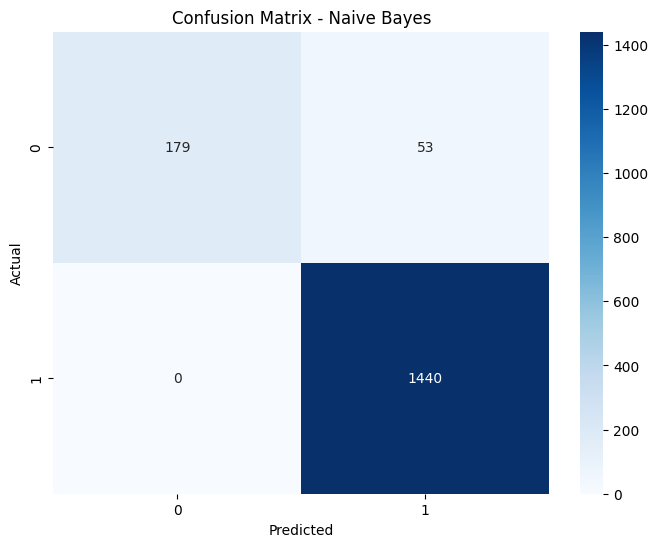

In [275]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# **Building a Predictive System**

In [276]:
# Making prediction on new input email
input_mail = ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]

# Convert text to feature vectors
input_mail_counts = vectorizer.transform(input_mail)
input_mail_tfidf = tfidf_transformer.transform(input_mail_counts)

# Making prediction
prediction = nb_model.predict(input_mail_tfidf)
print(prediction)

if (prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail
